### 2D-Geometrie mit Shapely

[Video](https://youtu.be/qlCe7l9ssew)  -  [Shapely-Doku](https://shapely.readthedocs.io/en/stable/manual.html)

In [ ]:
from shapely.geometry import Point, LineString, Polygon
from shapely import  geometrycollections, shortest_line

#### Points

In [176]:
p1 = Point(1,2)
p2 = Point(2,3)
print(p1)
print(p2)

POINT (1 2)
POINT (2 3)


In [177]:
p1.distance(p2)

1.4142135623730951

In [178]:
p1.x, p1.y

(1.0, 2.0)

#### LineStrings

Ein LineString ist eine Folge von Liniensegmenten. Die Segmente können sich schneiden.

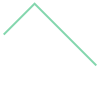

In [180]:
from shapely.geometry import LineString
line = LineString([(2,3),(3,4),(5,2)])
line

In [181]:
line.length

4.242640687119286

In [182]:
# Die Koordinaten durchlaufen
for x, y in line.coords:
    print(x,y)

2.0 3.0
3.0 4.0
5.0 2.0


#### Schnitt zweier Segmente

schneidet = True
Schnitt POINT (2.142857142857143 2.142857142857143)
Abstand 0.0


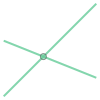

In [183]:
a = LineString([(0, 0), (5, 5)])
b = LineString([(0, 3), (5, 1)])
schneidet = a.crosses(b)
x = a.intersection(b)
d = a.distance(b)
print(f'schneidet = {schneidet}')
print(f'Schnitt {x}')
print(f'Abstand {d}')
geometrycollections([a,b,x])

schneidet = False
Schnitt LINESTRING EMPTY
Abstand 1.0


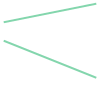

In [184]:
a = LineString([(0, 4), (5, 5)])
b = LineString([(0, 3), (5, 1)])
schneidet = a.crosses(b)
x = a.intersection(b)
d = a.distance(b)
print(f'schneidet = {schneidet}')
print(f'Schnitt {x}')
print(f'Abstand {d}')
geometrycollections([a,b,x])

schneidet = False
Schnitt LINESTRING (1 1, 3 3)
Abstand 0.0


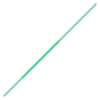

In [185]:
a = LineString([(0, 0), (3, 3)])
b = LineString([(1, 1), (5, 5)])
schneidet = a.crosses(b)
x = a.intersection(b)
d = a.distance(b)
print(f'schneidet = {schneidet}')
print(f'Schnitt {x}')
print(f'Abstand {d}')
geometrycollections([a,b,x])

#### Abstandslinie

Shortest LINESTRING (3 1, 2.307692307692308 4.461538461538462)
Abstand 3.5301


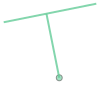

In [187]:
a = LineString([(0, 4), (5, 5)])
p = Point(3,1)
c = shortest_line(p,a)
d = p.distance(a)
print(f'Shortest {c}')
print(f'Abstand {d:.4f}')
geometrycollections([a,p,c])

Shortest LINESTRING (-3 1, 0 4)
Abstand 4.242640687119285


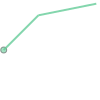

In [190]:
a = LineString([(0, 4), (5, 5)])
p = Point(-3,1)
c = shortest_line(p,a)
d = p.distance(a)
print(f'Shortest {c}')
print(f'Abstand {d}')
geometrycollections([a,p,c])

#### Polygons

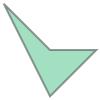

In [191]:
pg = Polygon([(1,4),(2,2),(3,3),(2,3)])
pg

Fläche 0.5
Länge 3.414213562373095
Shortest LINESTRING (2 3, 1.7307692307692308 4.346153846153846)
Abstand 1.372812945967288


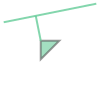

In [192]:
a = LineString([(0, 4), (5, 5)])
pg = Polygon([(2,2),(3,3),(2,3)])
print(f'Fläche {pg.area}')
print(f'Länge {pg.length}')
c = shortest_line(pg,a)
d = pg.distance(a)
print(f'Shortest {c}')
print(f'Abstand {d}')
geometrycollections([a,pg,c])           

#### Plotten

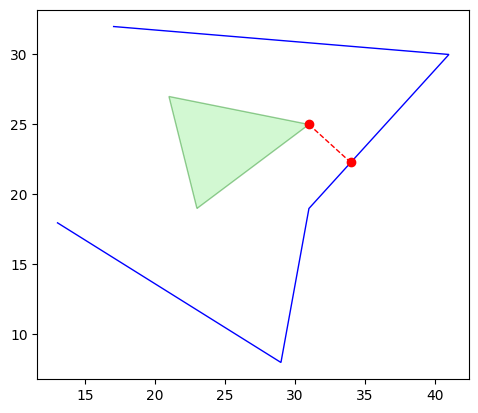

In [193]:
import matplotlib.pyplot as plt
from shapely import plotting

ls = LineString([(13, 18),(29, 8),(31, 19),(41, 30),(17, 32)])
po = Polygon([(23, 19), (31, 25), (21, 27)])

c = shortest_line(po,ls)

fig, ax = plt.subplots()
plotting.plot_line(ls, ax=ax, add_points=False, color="blue",linewidth=1)
plotting.plot_polygon(po, ax=ax, add_points=False, facecolor="lightgreen", edgecolor="green", alpha=0.4)
plotting.plot_line(c, ax=ax, color="red", linestyle="--",linewidth=1)
                  
ax.set_aspect("equal")
plt.show()